In [1]:
import pandas as pd
import CococoNet_reader 
import pandas as pd
import numpy as np
import itertools
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import bottleneck as bn

In [2]:
maize_arab_map = pd.read_csv('/data/CoCoCoNet/orthologMaps/arabidopsis_maize_orthoNM.csv', )

In [3]:
maize_arab_map

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001
3,AT5G44040,Zm00001d027589,3702_0:0059af,4577_0:000005
4,AT1G04030,Zm00001d027589,3702_0:000ec7,4577_0:000005
...,...,...,...,...
37574,AT2G07696,GRMZM5G890451,3702_0:006ac8,4577_0:00916d
37575,AT3G03600,GRMZM5G851130,3702_0:00304f,4577_0:009170
37576,AT2G07707,GRMZM5G816772,3702_0:002022,4577_0:009198
37577,AT2G07722,GRMZM5G899452,3702_0:006abf,4577_0:0091af


In [4]:
maize_arab_map_one_to_one = pd.read_csv('/data/passala/Data_from_CoCoCoNet/One_to_one_mapping_from_cococonet/arabi_maize_one_one_converted_format.csv')

In [5]:
maize_arab_map_one_to_one = maize_arab_map_one_to_one.drop_duplicates(subset='arabidopsis', keep= False,)
maize_arab_map_one_to_one = maize_arab_map_one_to_one.drop_duplicates(subset= 'maize', keep= False)
maize_arab_map_one_to_one

,maize_OrthoID,arabidopsis_OrthoID,arabidopsis,maize
0,4577_0:000007,3702_0:0069ac,AT5G42760,Zm00001d034249
1,4577_0:000f75,3702_0:005b5f,AT5G39940,Zm00001d031216
4,4577_0:0046b7,3702_0:00531b,AT5G65740,Zm00001d013361
5,4577_0:0017b6,3702_0:005a44,AT5G22130,Zm00001d005370
6,4577_0:00723a,3702_0:002823,AT2G34200,Zm00001d011763
...,...,...,...,...
2705,4577_0:002b63,3702_0:0054af,AT5G04010,Zm00001d043190
2706,4577_0:005cab,3702_0:002a1b,AT2G03800,Zm00001d036888
2707,4577_0:004670,3702_0:003b07,AT3G07640,Zm00001d017000
2713,4577_0:0035d7,3702_0:0011d4,AT1G23390,Zm00001d043723


In [6]:
dictionary_mapper_arab_to_maize = maize_arab_map_one_to_one.set_index("arabidopsis").to_dict()['maize']
dictionary_mapper_maize_to_arab = maize_arab_map_one_to_one.set_index('maize').to_dict()['arabidopsis']



In [7]:
arab_cococonet = CococoNet_reader.read_cococonet('arabidopsis')
maize_cococonet = CococoNet_reader.read_cococonet('maize')


In [8]:
maize_cococonet

,Zm00001d027231,Zm00001d027232,Zm00001d027233,Zm00001d027236,Zm00001d027239,Zm00001d027240,Zm00001d027242,Zm00001d027248,Zm00001d027253,Zm00001d027254,...,ENSRNA049478584,ENSRNA049478607,ENSRNA049478600,Zm00001d000447,Zm00001d000452,ENSRNA049479090,ENSRNA049478822,ENSRNA049478534,ENSRNA049478530,ENSRNA049478881
Zm00001d027231,1.000000,0.078108,0.108838,0.461957,0.800930,0.319041,0.760313,0.660045,0.359478,0.588317,...,0.200135,0.149610,0.229181,0.073480,0.382390,0.226575,0.207282,0.175594,0.204687,0.181446
Zm00001d027232,0.078108,1.000000,0.876293,0.694633,0.214400,0.120976,0.026657,0.382087,0.287655,0.447700,...,0.078462,0.039292,0.145391,0.032343,0.135960,0.032805,0.034453,0.028501,0.069983,0.055660
Zm00001d027233,0.108838,0.876293,1.000000,0.670667,0.536561,0.207089,0.146332,0.328618,0.438306,0.540782,...,0.037824,0.038944,0.072977,0.011442,0.277296,0.015186,0.047389,0.013844,0.054827,0.073887
Zm00001d027236,0.461957,0.694633,0.670667,1.000000,0.656247,0.302919,0.200345,0.460549,0.135278,0.479839,...,0.044842,0.012275,0.142607,0.149006,0.417343,0.057754,0.107408,0.058877,0.062916,0.111273
Zm00001d027239,0.800930,0.214400,0.536561,0.656247,1.000000,0.457139,0.921456,0.095157,0.205044,0.489878,...,0.131221,0.093305,0.128835,0.103421,0.667229,0.090521,0.056203,0.156326,0.082495,0.167994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSRNA049479090,0.226575,0.032805,0.015186,0.057754,0.090521,0.100821,0.150854,0.062272,0.111443,0.113159,...,0.967584,0.893915,0.957201,0.048170,0.045550,1.000000,0.960540,0.979233,0.984839,0.986418
ENSRNA049478822,0.207282,0.034453,0.047389,0.107408,0.056203,0.110707,0.080529,0.061199,0.056742,0.055877,...,0.946128,0.900723,0.943176,0.043434,0.028705,0.960540,1.000000,0.978136,0.966372,0.981323
ENSRNA049478534,0.175594,0.028501,0.013844,0.058877,0.156326,0.145373,0.157355,0.106117,0.138546,0.235968,...,0.972773,0.914726,0.980563,0.119946,0.058226,0.979233,0.978136,1.000000,0.977791,0.985272
ENSRNA049478530,0.204687,0.069983,0.054827,0.062916,0.082495,0.110693,0.165403,0.207660,0.066610,0.087071,...,0.992406,0.935132,0.974161,0.017457,0.031221,0.984839,0.966372,0.977791,1.000000,0.994383


In [9]:
maize_arab_map['Group ID'] = 'Unassigned'

In [10]:
maize_arab_map

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001,Unassigned
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001,Unassigned
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001,Unassigned
3,AT5G44040,Zm00001d027589,3702_0:0059af,4577_0:000005,Unassigned
4,AT1G04030,Zm00001d027589,3702_0:000ec7,4577_0:000005,Unassigned
...,...,...,...,...,...
37574,AT2G07696,GRMZM5G890451,3702_0:006ac8,4577_0:00916d,Unassigned
37575,AT3G03600,GRMZM5G851130,3702_0:00304f,4577_0:009170,Unassigned
37576,AT2G07707,GRMZM5G816772,3702_0:002022,4577_0:009198,Unassigned
37577,AT2G07722,GRMZM5G899452,3702_0:006abf,4577_0:0091af,Unassigned


In [11]:
id_indexer = 0
for gene_pair in maize_arab_map.iterrows():
    
    if gene_pair[1]['Group ID'] == 'Unassigned':
        current_arab_gene = gene_pair[1]['arabidopsis']
        current_maize_gene = gene_pair[1]['maize']
        maize_arab_map['Group ID'].loc[(maize_arab_map['arabidopsis'] == current_arab_gene) & (maize_arab_map['Group ID'] == 'Unassigned')] = id_indexer
        maize_arab_map['Group ID'].loc[(maize_arab_map['maize'] == current_maize_gene) & (maize_arab_map['Group ID'] == 'Unassigned')] = id_indexer

        all_labeled_groups = maize_arab_map.loc[maize_arab_map['Group ID'] == id_indexer]

        all_labeled_groups_arab_genes = all_labeled_groups['arabidopsis'].to_list()
        all_labeled_groups_maize_genes = all_labeled_groups['maize'].to_list()

        maize_arab_map['Group ID'].loc[maize_arab_map['arabidopsis'].isin(all_labeled_groups_arab_genes)] = id_indexer
        maize_arab_map['Group ID'].loc[maize_arab_map['maize'].isin(all_labeled_groups_maize_genes)] = id_indexer

        id_indexer += 1




In [12]:
# id_indexer = 0
# for gene_pair in maize_arab_map.iterrows():
#     if gene_pair[0] == 2643:
#         break

In [13]:
maize_arab_map

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001,0
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001,0
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001,0
3,AT5G44040,Zm00001d027589,3702_0:0059af,4577_0:000005,1
4,AT1G04030,Zm00001d027589,3702_0:000ec7,4577_0:000005,1
...,...,...,...,...,...
37574,AT2G07696,GRMZM5G890451,3702_0:006ac8,4577_0:00916d,8107
37575,AT3G03600,GRMZM5G851130,3702_0:00304f,4577_0:009170,8108
37576,AT2G07707,GRMZM5G816772,3702_0:002022,4577_0:009198,8109
37577,AT2G07722,GRMZM5G899452,3702_0:006abf,4577_0:0091af,8110


In [14]:
maize_arab_map.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/pairs_with_group_ID.csv')

In [14]:
maize_arab_map.loc[maize_arab_map['arabidopsis'] == 'AT1G13970']

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
2643,AT1G13970,Zm00001d029566,3702_0:001b21,4577_0:000a69,1036
20936,AT1G13970,Zm00001d013239,3702_0:001b21,4577_0:004e4d,1036
37568,AT1G13970,Zm00001d000143,3702_0:001b21,4577_0:009103,1036


In [15]:
maize_arab_map.loc[maize_arab_map['maize'] == 'Zm00001d029566']

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
2642,AT3G29180,Zm00001d029566,3702_0:003133,4577_0:000a69,1036
2643,AT1G13970,Zm00001d029566,3702_0:001b21,4577_0:000a69,1036
2644,AT5G39430,Zm00001d029566,3702_0:006305,4577_0:000a69,1036


In [16]:
id_indexer = 1116

In [17]:
# all_labeled_groups = maize_arab_map.loc[maize_arab_map['Group ID'] == id_indexer]
# all_labeled_groups_arab_genes = all_labeled_groups['arabidopsis'].to_list()
# all_labeled_groups_maize_genes = all_labeled_groups['maize'].to_list()

# maize_arab_map['Group ID'].loc[maize_arab_map['arabidopsis'].isin(all_labeled_groups_arab_genes)] = id_indexer
# maize_arab_map['Group ID'].loc[maize_arab_map['maize'].isin(all_labeled_groups_maize_genes)] = id_indexer
# maize_arab_map.loc[maize_arab_map['maize'].isin(all_labeled_groups_maize_genes)]


In [18]:
maize_arab_map.loc[maize_arab_map['Group ID'] == 0]

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001,0
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001,0
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001,0
293,AT3G50620,Zm00001d029417,3702_0:00343c,4577_0:000151,0
294,AT2G15730,Zm00001d029417,3702_0:001f0c,4577_0:000151,0
295,AT4G34420,Zm00001d029417,3702_0:004867,4577_0:000151,0
18054,AT3G50620,Zm00001d052886,3702_0:00343c,4577_0:0042a3,0
18055,AT4G34420,Zm00001d052886,3702_0:004867,4577_0:0042a3,0
18056,AT2G15730,Zm00001d052886,3702_0:001f0c,4577_0:0042a3,0
27531,AT3G50620,Zm00001d022334,3702_0:00343c,4577_0:0067f2,0


In [19]:
all_pairs_to_evaluate_for_functional_conservation = pd.DataFrame(columns = ['Arabidopsis','Maize','Group Number'])
for group_number in list(set(maize_arab_map['Group ID'].to_list())):
    current_gene_map = maize_arab_map.loc[maize_arab_map['Group ID'] == group_number]
    list_of_arab_genes_in_group = list(set(current_gene_map['arabidopsis'].to_list()))
    list_of_maize_genes_in_group = list(set(current_gene_map['maize'].to_list()))
    all_combo_list_current_genes = itertools.product(list_of_arab_genes_in_group,list_of_maize_genes_in_group)
    all_combo_list_current_genes = list(map(list,all_combo_list_current_genes))
    current_list_of_pairs = pd.DataFrame(all_combo_list_current_genes,columns = ['Arabidopsis','Maize'])
    current_list_of_pairs['Group Number'] = group_number
    all_pairs_to_evaluate_for_functional_conservation = all_pairs_to_evaluate_for_functional_conservation.append(current_list_of_pairs)





/tmp/ipykernel_576361/251400695.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_pairs_to_evaluate_for_functional_conservation = all_pairs_to_evaluate_for_functional_conservation.append(current_list_of_pairs)
/tmp/ipykernel_576361/251400695.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_pairs_to_evaluate_for_functional_conservation = all_pairs_to_evaluate_for_functional_conservation.append(current_list_of_pairs)
/tmp/ipykernel_576361/251400695.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_pairs_to_evaluate_for_functional_conservation = all_pairs_to_evaluate_for_functional_conservation.append(current_list_of_pairs)
/tmp/ipykernel_576361/251400695.py:10: FutureWarning: The frame.append method is d

In [20]:
all_pairs_to_evaluate_for_functional_conservation['Arabidopsis Score'] = np.nan
all_pairs_to_evaluate_for_functional_conservation['Maize Score'] = np.nan
#all_pairs_to_evaluate_for_functional_conservation.to_csv('/home/passala/git/Coexpressalog_Method_Development/all_pairs_From_maize.csv',index = False)

In [21]:
trimmed_arab_cococonet = arab_cococonet[arab_cococonet.columns.intersection(maize_arab_map['arabidopsis'].to_list())]
trimmed_arab_cococonet = trimmed_arab_cococonet[trimmed_arab_cococonet.index.isin(maize_arab_map['arabidopsis'].to_list())]
double_arab_trimmed_cococonet = trimmed_arab_cococonet[trimmed_arab_cococonet.columns.intersection(maize_arab_map_one_to_one['arabidopsis'].to_list())]
double_arab_trimmed_cococonet = double_arab_trimmed_cococonet.replace(1,0)

trimmed_maize_cococonet = maize_cococonet[maize_cococonet.columns.intersection(maize_arab_map['maize'].to_list())]
trimmed_maize_cococonet = trimmed_maize_cococonet[trimmed_maize_cococonet.index.isin(maize_arab_map['maize'].to_list())]
double_maize_trimmed_cococonet = trimmed_maize_cococonet[trimmed_maize_cococonet.columns.intersection(maize_arab_map_one_to_one['maize'].to_list())]
double_maize_trimmed_cococonet = double_maize_trimmed_cococonet.replace(1,0)

In [22]:
double_arab_trimmed_cococonet

,AT1G01770,AT1G01920,AT1G02160,AT1G02290,AT1G02330,AT1G03030,AT1G03360,AT1G03700,AT1G04130,AT1G04190,...,AT4G38020,AT4G38160,AT4G38440,AT4G38490,AT4G38495,AT4G38890,AT4G38980,AT4G39420,AT4G39820,AT4G39920
AT1G01030,0.485015,0.559258,0.395847,0.600879,0.552650,0.489123,0.571583,0.036943,0.564645,0.589974,...,0.605219,0.668144,0.495628,0.481259,0.416256,0.612807,0.683579,0.617965,0.504166,0.481140
AT1G01040,0.872016,0.931024,0.822525,0.932800,0.924852,0.910187,0.754414,0.190222,0.829020,0.917105,...,0.683808,0.573642,0.971137,0.688553,0.625472,0.926822,0.826271,0.990434,0.871289,0.816649
AT1G01050,0.733041,0.900200,0.960574,0.916191,0.926429,0.938448,0.866884,0.322698,0.917228,0.978683,...,0.830072,0.837720,0.807695,0.933711,0.822141,0.946175,0.907611,0.843958,0.927359,0.898666
AT1G01060,0.054938,0.083733,0.053805,0.256594,0.249323,0.256713,0.186761,0.032906,0.492783,0.276185,...,0.201789,0.121656,0.088421,0.097389,0.122934,0.267601,0.410908,0.366687,0.161857,0.169496
AT1G01070,0.593918,0.464664,0.464931,0.663811,0.568685,0.686076,0.352345,0.276304,0.499311,0.700351,...,0.276834,0.211529,0.565528,0.385132,0.548600,0.543998,0.584599,0.703772,0.611591,0.535898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT4G40020,0.139751,0.298036,0.110090,0.210107,0.548538,0.461862,0.247061,0.147303,0.333423,0.354786,...,0.077759,0.002083,0.393372,0.022845,0.185808,0.324026,0.235607,0.435461,0.663522,0.258896
AT4G40042,0.545434,0.791935,0.959531,0.773639,0.855875,0.931021,0.622760,0.434457,0.635871,0.808132,...,0.596289,0.336546,0.634201,0.831771,0.861398,0.625369,0.793302,0.495218,0.897511,0.831461
AT4G40050,0.902749,0.968570,0.927427,0.975317,0.966253,0.981615,0.771689,0.426817,0.913741,0.966547,...,0.665615,0.574618,0.957582,0.773903,0.843512,0.918961,0.926346,0.975953,0.974444,0.922712
AT4G40060,0.719792,0.887170,0.882722,0.924322,0.797838,0.841379,0.644606,0.430547,0.724336,0.844829,...,0.630376,0.631191,0.747474,0.792326,0.816008,0.750530,0.799855,0.757518,0.719262,0.728641


In [23]:
maize_cococonet_ranked = trimmed_maize_cococonet.rank()
arab_cococonet_ranked = trimmed_arab_cococonet.rank()

In [24]:
data = [[3,4,5],[2,6,9],[1,20,11],[34,12,14]]
test_dataframe = pd.DataFrame(data, columns = ['a','b','c'])
test_dataframe

,a,b,c
0,3,4,5
1,2,6,9
2,1,20,11
3,34,12,14


In [25]:
test_dataframe.rank()

,a,b,c
0,3.0,1.0,1.0
1,2.0,2.0,2.0
2,1.0,4.0,3.0
3,4.0,3.0,4.0


In [26]:
maize_cococonet

,Zm00001d027231,Zm00001d027232,Zm00001d027233,Zm00001d027236,Zm00001d027239,Zm00001d027240,Zm00001d027242,Zm00001d027248,Zm00001d027253,Zm00001d027254,...,ENSRNA049478584,ENSRNA049478607,ENSRNA049478600,Zm00001d000447,Zm00001d000452,ENSRNA049479090,ENSRNA049478822,ENSRNA049478534,ENSRNA049478530,ENSRNA049478881
Zm00001d027231,1.000000,0.078108,0.108838,0.461957,0.800930,0.319041,0.760313,0.660045,0.359478,0.588317,...,0.200135,0.149610,0.229181,0.073480,0.382390,0.226575,0.207282,0.175594,0.204687,0.181446
Zm00001d027232,0.078108,1.000000,0.876293,0.694633,0.214400,0.120976,0.026657,0.382087,0.287655,0.447700,...,0.078462,0.039292,0.145391,0.032343,0.135960,0.032805,0.034453,0.028501,0.069983,0.055660
Zm00001d027233,0.108838,0.876293,1.000000,0.670667,0.536561,0.207089,0.146332,0.328618,0.438306,0.540782,...,0.037824,0.038944,0.072977,0.011442,0.277296,0.015186,0.047389,0.013844,0.054827,0.073887
Zm00001d027236,0.461957,0.694633,0.670667,1.000000,0.656247,0.302919,0.200345,0.460549,0.135278,0.479839,...,0.044842,0.012275,0.142607,0.149006,0.417343,0.057754,0.107408,0.058877,0.062916,0.111273
Zm00001d027239,0.800930,0.214400,0.536561,0.656247,1.000000,0.457139,0.921456,0.095157,0.205044,0.489878,...,0.131221,0.093305,0.128835,0.103421,0.667229,0.090521,0.056203,0.156326,0.082495,0.167994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSRNA049479090,0.226575,0.032805,0.015186,0.057754,0.090521,0.100821,0.150854,0.062272,0.111443,0.113159,...,0.967584,0.893915,0.957201,0.048170,0.045550,1.000000,0.960540,0.979233,0.984839,0.986418
ENSRNA049478822,0.207282,0.034453,0.047389,0.107408,0.056203,0.110707,0.080529,0.061199,0.056742,0.055877,...,0.946128,0.900723,0.943176,0.043434,0.028705,0.960540,1.000000,0.978136,0.966372,0.981323
ENSRNA049478534,0.175594,0.028501,0.013844,0.058877,0.156326,0.145373,0.157355,0.106117,0.138546,0.235968,...,0.972773,0.914726,0.980563,0.119946,0.058226,0.979233,0.978136,1.000000,0.977791,0.985272
ENSRNA049478530,0.204687,0.069983,0.054827,0.062916,0.082495,0.110693,0.165403,0.207660,0.066610,0.087071,...,0.992406,0.935132,0.974161,0.017457,0.031221,0.984839,0.966372,0.977791,1.000000,0.994383


In [27]:
maize_cococonet_ranked

,Zm00001d027259,Zm00001d027267,Zm00001d027268,Zm00001d027276,Zm00001d027281,Zm00001d027283,Zm00001d027290,Zm00001d027291,Zm00001d027292,Zm00001d027293,...,Zm00001d000408,Zm00001d000424,Zm00001d000428,Zm00001d000430,Zm00001d000434,Zm00001d000435,Zm00001d000436,Zm00001d000439,Zm00001d000443,Zm00001d000447
Zm00001d027259,13664.0,7268.0,8155.0,7253.0,9417.0,4607.0,2664.0,1058.0,6963.0,7236.0,...,6800.0,1357.0,12753.0,2801.0,3742.0,13133.0,10012.0,3314.0,9813.0,3584.0
Zm00001d027267,6249.0,13664.0,11493.0,13560.0,2701.0,8846.0,11507.0,12099.0,8817.0,9350.0,...,12596.0,11592.0,8473.0,10959.0,11901.0,6432.0,6838.0,12930.0,5714.0,6847.0
Zm00001d027268,3304.0,3753.0,13664.0,947.0,2622.0,2535.0,1936.0,12400.0,13255.0,2773.0,...,2844.0,1810.0,1200.0,5074.0,5851.0,2714.0,2200.0,2066.0,4692.0,952.0
Zm00001d027276,6454.0,13624.0,3583.0,13664.0,8808.0,9876.0,11472.0,6804.0,3653.0,12460.0,...,10851.0,12823.0,9496.0,9242.0,11451.0,8749.0,10060.0,12406.0,4689.0,11666.0
Zm00001d027281,3064.0,291.0,1629.0,1905.0,13664.0,9881.0,4955.0,9287.0,3971.0,772.0,...,857.0,870.0,2706.0,150.0,3019.0,2127.0,1978.0,5081.0,3018.0,5404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d000435,12233.0,6761.0,6817.0,9783.0,7149.0,5721.0,5434.0,3015.0,5076.0,10305.0,...,9870.0,6084.0,11313.0,8865.0,4373.0,13664.0,13662.0,5445.0,7717.0,2282.0
Zm00001d000436,9953.0,9539.0,7249.0,12619.0,8706.0,6952.0,4518.0,4497.0,4494.0,12712.0,...,11722.0,9836.0,11872.0,13382.0,5798.0,13643.0,13664.0,12912.0,9284.0,5879.0
Zm00001d000439,2983.0,10290.0,4306.0,8672.0,11529.0,8638.0,2580.0,7433.0,8682.0,8991.0,...,9238.0,5168.0,5460.0,9524.0,9609.0,3880.0,7252.0,13664.0,4036.0,11509.0
Zm00001d000443,9314.0,7140.0,13179.0,5502.0,11593.0,13039.0,12663.0,12609.0,7996.0,5790.0,...,4502.0,5295.0,7664.0,8629.0,2668.0,8639.0,8691.0,7525.0,13664.0,1472.0


In [28]:
double_maize_trimmed_cococonet

,Zm00001d027259,Zm00001d027276,Zm00001d027324,Zm00001d027339,Zm00001d027342,Zm00001d027363,Zm00001d027369,Zm00001d027384,Zm00001d027385,Zm00001d027439,...,Zm00001d026598,Zm00001d026671,Zm00001d026685,Zm00001d026702,Zm00001d026705,Zm00001d000034,Zm00001d000035,Zm00001d000122,Zm00001d000328,Zm00001d000360
Zm00001d027259,0.000000,0.787600,0.982736,0.889360,0.860111,0.193768,0.690487,0.870408,0.838404,0.780433,...,0.722510,0.770570,0.987366,0.956539,0.921622,0.935050,0.913713,0.962653,0.950080,0.477768
Zm00001d027267,0.776152,0.974850,0.794348,0.839788,0.788460,0.563234,0.808762,0.831290,0.868777,0.757604,...,0.687830,0.674264,0.721394,0.911190,0.904763,0.503973,0.930798,0.754105,0.911877,0.392971
Zm00001d027268,0.501879,0.323943,0.469694,0.402164,0.367800,0.694919,0.694311,0.425337,0.348725,0.392596,...,0.327490,0.117829,0.602981,0.563368,0.533331,0.322963,0.385575,0.636689,0.601013,0.560843
Zm00001d027276,0.787600,0.000000,0.848125,0.955577,0.895527,0.317374,0.662233,0.746190,0.940021,0.819783,...,0.819613,0.801727,0.811303,0.907138,0.893040,0.395478,0.892746,0.586103,0.826555,0.353368
Zm00001d027281,0.469888,0.445077,0.311179,0.472967,0.681314,0.121552,0.107122,0.325287,0.460053,0.323252,...,0.206478,0.584392,0.494165,0.633598,0.363163,0.574518,0.225494,0.480756,0.172993,0.196648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d000435,0.981547,0.858523,0.933271,0.880739,0.721412,0.149986,0.668719,0.869240,0.828144,0.766067,...,0.711577,0.689347,0.906810,0.910896,0.911477,0.744722,0.787338,0.863046,0.942627,0.393991
Zm00001d000436,0.929615,0.930603,0.945329,0.934675,0.849365,0.262820,0.622326,0.907346,0.924452,0.813299,...,0.754405,0.847911,0.934060,0.942693,0.972042,0.801192,0.834174,0.861783,0.919060,0.481259
Zm00001d000439,0.458940,0.830214,0.670260,0.748558,0.797560,0.387771,0.492785,0.578551,0.877228,0.594646,...,0.667793,0.755666,0.542103,0.844705,0.773223,0.524156,0.721428,0.613874,0.694269,0.550113
Zm00001d000443,0.911135,0.712977,0.922837,0.790722,0.885516,0.714901,0.651878,0.831202,0.740287,0.847480,...,0.743592,0.813436,0.962523,0.947868,0.864913,0.904520,0.870823,0.978912,0.848062,0.779458


In [29]:
double_arab_trimmed_cococonet.T

,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01090,AT1G01100,AT1G01110,AT1G01120,AT1G01140,...,AT4G39970,AT4G39980,AT4G39990,AT4G40000,AT4G40010,AT4G40020,AT4G40042,AT4G40050,AT4G40060,AT4G40070
AT1G01770,0.485015,0.872016,0.733041,0.054938,0.593918,0.716696,0.360791,0.481673,0.191743,0.776049,...,0.558102,0.422962,0.411522,0.379397,0.322961,0.139751,0.545434,0.902749,0.719792,0.529321
AT1G01920,0.559258,0.931024,0.900200,0.083733,0.464664,0.874421,0.923291,0.849645,0.438066,0.482860,...,0.412813,0.717130,0.834784,0.964666,0.529815,0.298036,0.791935,0.968570,0.887170,0.570864
AT1G02160,0.395847,0.822525,0.960574,0.053805,0.464931,0.851207,0.976976,0.689762,0.438799,0.470690,...,0.733671,0.707917,0.847985,0.681874,0.436065,0.110090,0.959531,0.927427,0.882722,0.649189
AT1G02290,0.600879,0.932800,0.916191,0.256594,0.663811,0.935277,0.794537,0.784049,0.488116,0.602825,...,0.542254,0.707141,0.836424,0.860736,0.615970,0.210107,0.773639,0.975317,0.924322,0.498986
AT1G02330,0.552650,0.924852,0.926429,0.249323,0.568685,0.870641,0.929634,0.631265,0.511933,0.611335,...,0.404375,0.879822,0.973308,0.929290,0.586608,0.548538,0.855875,0.966253,0.797838,0.595805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT4G38890,0.612807,0.926822,0.946175,0.267601,0.543998,0.967442,0.979948,0.709144,0.554014,0.536792,...,0.672963,0.938614,0.907364,0.994285,0.444912,0.324026,0.625369,0.918961,0.750530,0.317848
AT4G38980,0.683579,0.826271,0.907611,0.410908,0.584599,0.826777,0.909821,0.510855,0.556454,0.711126,...,0.659461,0.600429,0.858587,0.609823,0.513944,0.235607,0.793302,0.926346,0.799855,0.550628
AT4G39420,0.617965,0.990434,0.843958,0.366687,0.703772,0.833812,0.497324,0.464977,0.523195,0.797483,...,0.463047,0.784056,0.755083,0.712171,0.538853,0.435461,0.495218,0.975953,0.757518,0.451137
AT4G39820,0.504166,0.871289,0.927359,0.161857,0.611591,0.867278,0.895943,0.679207,0.626405,0.612756,...,0.378804,0.962382,0.976826,0.803429,0.588854,0.663522,0.897511,0.974444,0.719262,0.608061


In [30]:
top_10_arab_genes = np.array(
    [double_arab_trimmed_cococonet.T[c].nlargest(10).index.values for c in double_arab_trimmed_cococonet.T]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_arab_genes_dataframe = pd.DataFrame(
    data=top_10_arab_genes,
    index=double_arab_trimmed_cococonet.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_arab_genes_dataframe

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
AT1G01030,AT4G23740,AT2G26540,AT2G31530,AT3G12210,AT4G30580,AT5G52440,AT5G08540,AT3G55400,AT5G46420,AT4G11790
AT1G01040,AT3G54230,AT2G46560,AT5G13530,AT1G67140,AT1G55350,AT3G01460,AT2G40770,AT5G06120,AT4G02560,AT4G00800
AT1G01050,AT4G02580,AT1G09150,AT5G10460,AT3G52300,AT5G13450,AT4G37830,AT5G19150,AT2G05830,AT5G58005,AT3G05070
AT1G01060,AT5G03555,AT3G26570,AT5G24120,AT5G42760,AT4G37460,AT4G34350,AT4G24700,AT4G00050,AT1G18060,AT2G16070
AT1G01070,AT3G56950,AT2G38710,AT4G33780,AT5G40470,AT4G27040,AT3G24160,AT1G79690,AT2G36370,AT2G27090,AT1G69980
...,...,...,...,...,...,...,...,...,...,...
AT4G40020,AT3G57630,AT5G12930,AT4G04920,AT5G23520,AT5G13080,AT1G80460,AT5G49570,AT5G53330,AT1G04555,AT4G39820
AT4G40042,AT5G09830,AT1G48140,AT5G03460,AT1G69980,AT1G77710,AT1G26940,AT5G55000,AT4G37830,AT1G20575,AT2G03690
AT4G40050,AT2G39630,AT2G47960,AT5G19660,AT5G45360,AT2G16405,AT4G12230,AT4G24550,AT4G36630,AT2G43210,AT2G27900
AT4G40060,AT3G09470,AT1G06110,AT3G55770,AT2G42780,AT3G47610,AT4G21350,AT3G54480,AT1G28410,AT2G39630,AT4G36980


In [31]:
top_10_arab_genes

array([['AT4G23740', 'AT2G26540', 'AT2G31530', ..., 'AT3G55400',
        'AT5G46420', 'AT4G11790'],
       ['AT3G54230', 'AT2G46560', 'AT5G13530', ..., 'AT5G06120',
        'AT4G02560', 'AT4G00800'],
       ['AT4G02580', 'AT1G09150', 'AT5G10460', ..., 'AT2G05830',
        'AT5G58005', 'AT3G05070'],
       ...,
       ['AT2G39630', 'AT2G47960', 'AT5G19660', ..., 'AT4G36630',
        'AT2G43210', 'AT2G27900'],
       ['AT3G09470', 'AT1G06110', 'AT3G55770', ..., 'AT1G28410',
        'AT2G39630', 'AT4G36980'],
       ['AT5G63910', 'AT1G44770', 'AT2G46900', ..., 'AT5G19050',
        'AT1G80460', 'AT5G63610']], dtype=object)

In [32]:
top_10_arab_genes_as_maize = top_10_arab_genes_dataframe.replace(to_replace=dictionary_mapper_arab_to_maize)
top_10_arab_genes_as_maize

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
AT1G01030,Zm00001d008965,Zm00001d027950,Zm00001d038128,Zm00001d013359,Zm00001d013935,Zm00001d025267,Zm00001d002953,Zm00001d028038,Zm00001d039036,Zm00001d002615
AT1G01040,Zm00001d019561,Zm00001d011140,Zm00001d038106,Zm00001d046039,Zm00001d028818,Zm00001d053697,Zm00001d022436,Zm00001d037100,Zm00001d042212,Zm00001d015082
AT1G01050,Zm00001d038658,Zm00001d009074,Zm00001d031705,Zm00001d031825,Zm00001d051595,Zm00001d034218,Zm00001d049088,Zm00001d049042,Zm00001d032153,Zm00001d014894
AT1G01060,Zm00001d017531,Zm00001d017069,Zm00001d039194,Zm00001d034249,Zm00001d007938,Zm00001d033896,Zm00001d017086,Zm00001d029898,Zm00001d008499,Zm00001d018718
AT1G01070,Zm00001d028951,Zm00001d047034,Zm00001d028298,Zm00001d017099,Zm00001d006183,Zm00001d031849,Zm00001d052050,Zm00001d041983,Zm00001d028960,Zm00001d006337
...,...,...,...,...,...,...,...,...,...,...
AT4G40020,Zm00001d048298,Zm00001d006024,Zm00001d032567,Zm00001d025469,Zm00001d049173,Zm00001d002085,Zm00001d006422,Zm00001d045263,Zm00001d051916,Zm00001d016767
AT4G40042,Zm00001d042726,Zm00001d034252,Zm00001d051869,Zm00001d006337,Zm00001d042025,Zm00001d007594,Zm00001d048420,Zm00001d034218,Zm00001d034682,Zm00001d026598
AT4G40050,Zm00001d034659,Zm00001d032566,Zm00001d045217,Zm00001d014742,Zm00001d043292,Zm00001d030385,Zm00001d002925,Zm00001d033776,Zm00001d052785,Zm00001d029818
AT4G40060,Zm00001d030675,Zm00001d049083,Zm00001d017382,Zm00001d024462,Zm00001d020444,Zm00001d024672,Zm00001d022400,Zm00001d053275,Zm00001d034659,Zm00001d029426


In [33]:
have_arab_pairs = all_pairs_to_evaluate_for_functional_conservation.loc[all_pairs_to_evaluate_for_functional_conservation['Arabidopsis'].isin(top_10_arab_genes_as_maize.index)]
trimmed_all_gene_pairs_for_fc = have_arab_pairs.loc[have_arab_pairs['Maize'].isin(trimmed_maize_cococonet.index)]
trimmed_all_gene_pairs_for_fc = trimmed_all_gene_pairs_for_fc.reset_index(drop = True)
trimmed_all_gene_pairs_for_fc

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score
0,AT3G50620,Zm00001d029417,0,NaN,NaN
1,AT3G50620,Zm00001d047236,0,NaN,NaN
2,AT3G50620,Zm00001d031420,0,NaN,NaN
3,AT3G50620,Zm00001d022334,0,NaN,NaN
4,AT3G50620,Zm00001d052886,0,NaN,NaN
...,...,...,...,...,...
28453,AT2G35170,Zm00001d000053,8099,NaN,NaN
28454,AT4G17540,Zm00001d000035,8100,NaN,NaN
28455,AT4G16970,Zm00001d000034,8101,NaN,NaN
28456,AT2G15980,Zm00001d000435,8102,NaN,NaN


In [34]:
for two_genes in trimmed_all_gene_pairs_for_fc.iterrows():
    current_arab_gene = two_genes[1]['Arabidopsis']
    current_maize_gene = two_genes[1]['Maize']
    finger_print_genes = top_10_arab_genes_as_maize.loc[current_arab_gene].to_list()
    gene_ranks_in_maize = maize_cococonet_ranked.loc[maize_cococonet_ranked.index.isin(finger_print_genes), current_maize_gene]
    avg_rank_in_maize = gene_ranks_in_maize.mean()
    index_from_pairs = two_genes[0]
    trimmed_all_gene_pairs_for_fc.at[index_from_pairs, 'Arabidopsis Score'] = avg_rank_in_maize
    


In [35]:
top_10_arab_genes_as_maize.loc[top_10_arab_genes_as_maize.index.isin(['AT2G44680','AT5G47080'])]

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
AT5G47080,Zm00001d038107,Zm00001d020283,Zm00001d028695,Zm00001d022400,Zm00001d033345,Zm00001d018937,Zm00001d044917,Zm00001d050928,Zm00001d027556,Zm00001d027728
AT2G44680,Zm00001d034659,Zm00001d030421,Zm00001d006337,Zm00001d051910,Zm00001d028695,Zm00001d037509,Zm00001d003071,Zm00001d030184,Zm00001d002925,Zm00001d040435


In [36]:
# finger_print_genes_primo = top_10_arab_genes_as_maize.loc['AT2G44680'].to_list()
# finger_print_genes_primo


In [37]:
# finger_print_second = top_10_arab_genes_as_maize.loc['AT5G47080'].to_list()
# finger_print_second

In [38]:
# first_gene_ranks = maize_cococonet_ranked.loc[maize_cococonet_ranked.index.isin(finger_print_genes_primo), 'Zm00001d000052']
# first_gene_ranks.mean()/13659.5


In [39]:
# second_ranks = maize_cococonet_ranked.loc[maize_cococonet_ranked.index.isin(finger_print_second), 'Zm00001d000052']
# second_ranks.mean()/13659.5

In [40]:
trimmed_all_gene_pairs_for_fc

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score
0,AT3G50620,Zm00001d029417,0,11781.9,NaN
1,AT3G50620,Zm00001d047236,0,11122.8,NaN
2,AT3G50620,Zm00001d031420,0,10680.5,NaN
3,AT3G50620,Zm00001d022334,0,11293.4,NaN
4,AT3G50620,Zm00001d052886,0,10881.1,NaN
...,...,...,...,...,...
28453,AT2G35170,Zm00001d000053,8099,10874.4,NaN
28454,AT4G17540,Zm00001d000035,8100,8285.3,NaN
28455,AT4G16970,Zm00001d000034,8101,13596.9,NaN
28456,AT2G15980,Zm00001d000435,8102,11496.4,NaN


In [41]:
top_10_maize_genes = np.array(
    [double_maize_trimmed_cococonet.T[c].nlargest(10).index.values for c in double_maize_trimmed_cococonet.T]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_maize_genes_dataframe = pd.DataFrame(
    data=top_10_maize_genes,
    index=double_maize_trimmed_cococonet.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_maize_genes_dataframe

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
Zm00001d027259,Zm00001d029046,Zm00001d046587,Zm00001d014685,Zm00001d028238,Zm00001d052282,Zm00001d027706,Zm00001d024463,Zm00001d014500,Zm00001d029375,Zm00001d038807
Zm00001d027267,Zm00001d037902,Zm00001d011850,Zm00001d049083,Zm00001d027276,Zm00001d035519,Zm00001d051869,Zm00001d007158,Zm00001d031418,Zm00001d004739,Zm00001d002095
Zm00001d027268,Zm00001d045421,Zm00001d045366,Zm00001d005762,Zm00001d025992,Zm00001d016702,Zm00001d025267,Zm00001d011569,Zm00001d023655,Zm00001d007907,Zm00001d042066
Zm00001d027276,Zm00001d051869,Zm00001d049083,Zm00001d019426,Zm00001d009580,Zm00001d022159,Zm00001d048190,Zm00001d031062,Zm00001d030091,Zm00001d042535,Zm00001d036782
Zm00001d027281,Zm00001d009765,Zm00001d010465,Zm00001d039636,Zm00001d050705,Zm00001d005370,Zm00001d051663,Zm00001d035503,Zm00001d015560,Zm00001d003062,Zm00001d049082
...,...,...,...,...,...,...,...,...,...,...
Zm00001d000435,Zm00001d032567,Zm00001d015248,Zm00001d052800,Zm00001d011652,Zm00001d044019,Zm00001d005507,Zm00001d046039,Zm00001d027969,Zm00001d052282,Zm00001d043347
Zm00001d000436,Zm00001d032566,Zm00001d033422,Zm00001d021384,Zm00001d035874,Zm00001d015260,Zm00001d044902,Zm00001d038107,Zm00001d024709,Zm00001d006422,Zm00001d032567
Zm00001d000439,Zm00001d035519,Zm00001d002433,Zm00001d040459,Zm00001d022604,Zm00001d024462,Zm00001d047034,Zm00001d052978,Zm00001d012854,Zm00001d012662,Zm00001d014876
Zm00001d000443,Zm00001d002925,Zm00001d026359,Zm00001d029818,Zm00001d049499,Zm00001d019706,Zm00001d013314,Zm00001d028143,Zm00001d014759,Zm00001d029206,Zm00001d018545


In [42]:
top_10_maize_genes_as_arab = top_10_maize_genes_dataframe.replace(to_replace=dictionary_mapper_maize_to_arab)
top_10_maize_genes_as_arab

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
Zm00001d027259,AT1G06720,AT4G04940,AT2G04660,AT1G72440,AT1G79280,AT3G21540,AT3G55160,AT5G15920,AT2G38770,AT1G15440
Zm00001d027267,AT4G15563,AT2G25280,AT1G06110,AT5G61510,AT4G31130,AT5G03460,AT3G06810,AT4G03240,AT3G52030,AT2G12550
Zm00001d027268,AT4G34730,AT2G04700,AT1G74640,AT2G44760,AT5G03900,AT5G52440,AT2G31040,AT1G10830,AT5G06580,AT3G54440
Zm00001d027276,AT5G03460,AT1G06110,AT5G63440,AT2G34470,AT2G26210,AT5G10070,AT5G58920,AT1G65020,AT1G05720,AT4G04614
Zm00001d027281,AT3G48200,AT5G26230,AT1G52780,AT1G21090,AT5G22130,AT5G15770,AT5G50375,AT2G12646,AT2G20515,AT1G65270
...,...,...,...,...,...,...,...,...,...,...
Zm00001d000435,AT4G04920,AT5G64270,AT1G22310,AT5G55100,AT5G53440,AT3G04740,AT1G67140,AT3G21290,AT1G79280,AT1G27750
Zm00001d000436,AT2G47960,AT4G34460,AT2G03070,AT4G25720,AT5G24630,AT3G21350,AT4G17620,AT5G66180,AT5G49570,AT4G04920
Zm00001d000439,AT4G31130,AT4G19140,AT2G41000,AT2G20930,AT2G42780,AT2G38710,AT3G22950,AT4G14147,AT5G64510,AT3G50950
Zm00001d000443,AT4G24550,AT3G20720,AT2G27900,AT5G17620,AT2G15240,AT4G02030,AT5G42970,AT3G24080,AT5G12290,AT3G02710


In [43]:
for two_genes in trimmed_all_gene_pairs_for_fc.iterrows():
    current_arab_gene = two_genes[1]['Arabidopsis']
    current_maize_gene = two_genes[1]['Maize']
    finger_print_genes = top_10_maize_genes_as_arab.loc[current_maize_gene].to_list()
    gene_ranks_in_arab = arab_cococonet_ranked.loc[arab_cococonet_ranked.index.isin(finger_print_genes), current_arab_gene]
    avg_rank_in_arab = gene_ranks_in_arab.mean()
    index_from_pairs = two_genes[0]
    trimmed_all_gene_pairs_for_fc.loc[index_from_pairs, 'Maize Score'] = avg_rank_in_arab

In [44]:
trimmed_all_gene_pairs_for_fc

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score
0,AT3G50620,Zm00001d029417,0,11781.9,11035.4
1,AT3G50620,Zm00001d047236,0,11122.8,9903.1
2,AT3G50620,Zm00001d031420,0,10680.5,9046.7
3,AT3G50620,Zm00001d022334,0,11293.4,10914.5
4,AT3G50620,Zm00001d052886,0,10881.1,9991.8
...,...,...,...,...,...
28453,AT2G35170,Zm00001d000053,8099,10874.4,11526.6
28454,AT4G17540,Zm00001d000035,8100,8285.3,11278.4
28455,AT4G16970,Zm00001d000034,8101,13596.9,13341.2
28456,AT2G15980,Zm00001d000435,8102,11496.4,13004.3


In [45]:
trimmed_all_gene_pairs_for_fc['Arabidopsis Score'] = trimmed_all_gene_pairs_for_fc['Arabidopsis Score']/13659.5
trimmed_all_gene_pairs_for_fc['Maize Score'] = trimmed_all_gene_pairs_for_fc['Maize Score']/13839.5
trimmed_all_gene_pairs_for_fc['Total Score'] = trimmed_all_gene_pairs_for_fc[['Maize Score','Arabidopsis Score']].mean(axis = 1)
trimmed_all_gene_pairs_for_fc

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score,Total Score
0,AT3G50620,Zm00001d029417,0,0.862543,0.797384,0.829963
1,AT3G50620,Zm00001d047236,0,0.814290,0.715568,0.764929
2,AT3G50620,Zm00001d031420,0,0.781910,0.653687,0.717798
3,AT3G50620,Zm00001d022334,0,0.826780,0.788648,0.807714
4,AT3G50620,Zm00001d052886,0,0.796596,0.721977,0.759286
...,...,...,...,...,...,...
28453,AT2G35170,Zm00001d000053,8099,0.796105,0.832877,0.814491
28454,AT4G17540,Zm00001d000035,8100,0.606560,0.814943,0.710751
28455,AT4G16970,Zm00001d000034,8101,0.995417,0.963994,0.979706
28456,AT2G15980,Zm00001d000435,8102,0.841641,0.939651,0.890646


In [46]:
trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Arabidopsis'] == "AT4G28706"]

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score,Total Score


In [47]:
list_of_maize_pairs_for_psim = []
for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
    dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
    dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
    in_current_group_maize_genes = dataframe_of_group['Maize'].to_list()
    maize_pairs = itertools.combinations(in_current_group_maize_genes,2)
    maize_pairs = list(map(list,maize_pairs))
    list_of_maize_pairs_for_psim.extend(maize_pairs)
    

In [48]:
# dataframe_of_pairs_for_similarity_analysis = pd.DataFrame(data = list_of_maize_pairs_for_psim, columns = ['Gene 1','Gene 2'])
# dataframe_of_pairs_for_similarity_analysis.to_csv('/home/passala/Gene_duplication_project/Code/Penelope_maize_meristem_project/Minor_tables/pairs_for_maize_protein_similarity.csv',index = False)

In [49]:
# gene_info_maize = pd.read_csv('/data/CoCoCoNet/geneInfo/maize_info.csv')
# gene_info_maize

In [50]:
for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
    dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
    dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
    wide_format = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')

In [51]:
wide_format

Maize,Zm00001d000436
Arabidopsis,
AT5G51150,0.799722


In [52]:
wide_format.columns.to_list()

['Zm00001d000436']

In [53]:
~(wide_format>.55).any(axis = None)



False

In [54]:
maize_arab_map

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001,0
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001,0
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001,0
3,AT5G44040,Zm00001d027589,3702_0:0059af,4577_0:000005,1
4,AT1G04030,Zm00001d027589,3702_0:000ec7,4577_0:000005,1
...,...,...,...,...,...
37574,AT2G07696,GRMZM5G890451,3702_0:006ac8,4577_0:00916d,8107
37575,AT3G03600,GRMZM5G851130,3702_0:00304f,4577_0:009170,8108
37576,AT2G07707,GRMZM5G816772,3702_0:002022,4577_0:009198,8109
37577,AT2G07722,GRMZM5G899452,3702_0:006abf,4577_0:0091af,8110


In [55]:
#maize_arab_map.to_csv('/data/passala/Generated_Tables/Maize_Arab_integration/maize_arab_pairs.csv',index = False)

In [56]:
single_pair_junk_threshold = .7
many_to_many_junk_threshold = .8
difference_between_many_to_drop = .04
### .85 Tolerance = .75,.85,.03
## .7 Tolerance = .7,.8, .04

In [57]:
list_of_true_pairs = []
list_of_genes_to_average_and_set_to_be_equal = []
for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
    dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
    dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
    wide_format = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')
    if (wide_format<single_pair_junk_threshold).all(axis = None):
        continue
    elif wide_format.shape ==(0,0):
        continue
    elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
        one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format)>1 and len(wide_format.columns) ==1:
        one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format) == 1 and len(wide_format.columns)>1:
        one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
        list_of_true_pairs.append(one_true_pair)
    else:

        #Drop Low Quality Columns and Rows
        cols_to_drop = wide_format.columns[wide_format.max()<many_to_many_junk_threshold]
        wide_format = wide_format.drop(columns= cols_to_drop)
        rows_to_drop = wide_format.index[wide_format.max(axis = 1)<many_to_many_junk_threshold]
        wide_format = wide_format.drop(index= rows_to_drop)
        if (wide_format<single_pair_junk_threshold).all(axis = None):
            continue
        elif wide_format.shape ==(0,0):
            continue
        elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
            one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format)>1 and len(wide_format.columns) ==1:
            one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format) == 1 and len(wide_format.columns)>1:
            one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
            list_of_true_pairs.append(one_true_pair)
        elif (wide_format>.9).all(axis = None):
            ### Put in retention code here
            both_gene_lists_to_average = [wide_format.index.to_list(), wide_format.columns.to_list()]
            list_of_genes_to_average_and_set_to_be_equal.append(both_gene_lists_to_average)
            
        else:
            for cur_row in wide_format.iterrows():
                cur_row_max = cur_row[1].max()
                cur_row[1][cur_row[1]< cur_row_max - difference_between_many_to_drop] = np.nan
                wide_format.loc[cur_row[0]] = cur_row[1]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            for cur_col in wide_format.columns:
                cur_col_max = wide_format[cur_col].max()
                wide_format[cur_col].loc[wide_format[cur_col]< cur_col_max-difference_between_many_to_drop] = np.nan
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            col_count = wide_format.count() == 1
            wide_format = wide_format.loc[:,col_count]
            row_count = wide_format.count(axis = 1) ==1 
            wide_format = wide_format.loc[row_count,:]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            for label,content in wide_format.items():
                cur_maize_label = label
                cur_arab_label = content.idxmax()
                if type(cur_arab_label) == str:
                    one_true_pair = [cur_arab_label,cur_maize_label]
                    list_of_true_pairs.append(one_true_pair)
            
            
            




In [58]:
true_pair_dataframe = pd.DataFrame(columns= ['Arabidopsis Gene','Maize Gene'], data = list_of_true_pairs)
true_pair_dataframe

,Arabidopsis Gene,Maize Gene
0,AT5G44040,Zm00001d027589
1,AT5G42760,Zm00001d034249
2,AT3G53470,Zm00001d031946
3,AT1G32400,Zm00001d049526
4,AT1G79120,Zm00001d033415
...,...,...
6150,AT4G17080,Zm00001d000053
6151,AT4G17540,Zm00001d000035
6152,AT4G16970,Zm00001d000034
6153,AT2G15980,Zm00001d000435


In [83]:
###slimmer true frame 

#true_pair_dataframe.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/slimmmer_true_pair_frame_from_smaller_1_1_list.csv', index = False)

In [59]:
#true_pair_dataframe.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/true_pair_dataframe_at_80_tolerance.csv', index = False)


In [82]:
true_pair_dataframe.drop_duplicates(subset = 'Maize Gene')

,Arabidopsis Gene,Maize Gene
0,AT5G44040,Zm00001d027589
1,AT5G42760,Zm00001d034249
2,AT3G53470,Zm00001d031946
3,AT1G32400,Zm00001d049526
4,AT1G79120,Zm00001d033415
...,...,...
6150,AT4G17080,Zm00001d000053
6151,AT4G17540,Zm00001d000035
6152,AT4G16970,Zm00001d000034
6153,AT2G15980,Zm00001d000435


In [61]:
renamed_trimmed_all = trimmed_all_gene_pairs_for_fc.rename(columns = {'Arabidopsis':'Arabidopsis Gene','Maize':'Maize Gene'})
renamed_trimmed_all

,Arabidopsis Gene,Maize Gene,Group Number,Arabidopsis Score,Maize Score,Total Score
0,AT3G50620,Zm00001d029417,0,0.862543,0.797384,0.829963
1,AT3G50620,Zm00001d047236,0,0.814290,0.715568,0.764929
2,AT3G50620,Zm00001d031420,0,0.781910,0.653687,0.717798
3,AT3G50620,Zm00001d022334,0,0.826780,0.788648,0.807714
4,AT3G50620,Zm00001d052886,0,0.796596,0.721977,0.759286
...,...,...,...,...,...,...
28453,AT2G35170,Zm00001d000053,8099,0.796105,0.832877,0.814491
28454,AT4G17540,Zm00001d000035,8100,0.606560,0.814943,0.710751
28455,AT4G16970,Zm00001d000034,8101,0.995417,0.963994,0.979706
28456,AT2G15980,Zm00001d000435,8102,0.841641,0.939651,0.890646


In [62]:
#renamed_trimmed_all.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/many_to_many_coexpression_scores_for_jack.csv', index = False)


In [63]:
output_column_for_jack_with_scores = true_pair_dataframe.merge(right = renamed_trimmed_all[['Arabidopsis Gene','Maize Gene','Total Score']], on = ['Arabidopsis Gene','Maize Gene'])
output_column_for_jack_with_scores

,Arabidopsis Gene,Maize Gene,Total Score
0,AT5G44040,Zm00001d027589,0.953814
1,AT5G42760,Zm00001d034249,0.934674
2,AT3G53470,Zm00001d031946,0.914651
3,AT1G32400,Zm00001d049526,0.924191
4,AT1G79120,Zm00001d033415,0.778641
...,...,...,...
6150,AT4G17080,Zm00001d000053,0.837948
6151,AT4G17540,Zm00001d000035,0.710751
6152,AT4G16970,Zm00001d000034,0.979706
6153,AT2G15980,Zm00001d000435,0.890646


In [64]:
#output_column_for_jack_with_scores.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/true_pair_dataframe_at_80_tolerance_with_scores.csv', index = False)


In [65]:
len(list_of_genes_to_average_and_set_to_be_equal)

259

In [66]:
list_of_bottom_values = np.arange(.5,.92,.02)
list_of_top_values = np.arange(.6,1.02,.02)
list_of_top_values

array([0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 ,
       0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [67]:
list_of_len_of_true_pairs =[]
for bottom,top in zip(list_of_bottom_values,list_of_top_values):
    single_pair_junk_threshold = bottom
    many_to_many_junk_threshold = top

    list_of_true_pairs = []
    list_of_genes_to_average_and_set_to_be_equal = []
    for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
        dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
        dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
        wide_format = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')
        if (wide_format<single_pair_junk_threshold).all(axis = None):
            continue
        elif wide_format.shape ==(0,0):
            continue
        elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
            one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format)>1 and len(wide_format.columns) ==1:
            one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format) == 1 and len(wide_format.columns)>1:
            one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
            list_of_true_pairs.append(one_true_pair)
        else:

            #Drop Low Quality Columns and Rows
            cols_to_drop = wide_format.columns[wide_format.max()<many_to_many_junk_threshold]
            wide_format = wide_format.drop(columns= cols_to_drop)
            rows_to_drop = wide_format.index[wide_format.max(axis = 1)<many_to_many_junk_threshold]
            wide_format = wide_format.drop(index= rows_to_drop)
            if (wide_format<single_pair_junk_threshold).all(axis = None):
                continue
            elif wide_format.shape ==(0,0):
                continue
            elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
                one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
                list_of_true_pairs.append(one_true_pair)
            elif len(wide_format)>1 and len(wide_format.columns) ==1:
                one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
                list_of_true_pairs.append(one_true_pair)
            elif len(wide_format) == 1 and len(wide_format.columns)>1:
                one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
                list_of_true_pairs.append(one_true_pair)
            elif (wide_format>.9).all(axis = None):
                ### Put in retention code here
                both_gene_lists_to_average = [wide_format.index.to_list(), wide_format.columns.to_list()]
                list_of_genes_to_average_and_set_to_be_equal.append(both_gene_lists_to_average)
                
            else:
                for cur_row in wide_format.iterrows():
                    cur_row_max = cur_row[1].max()
                    cur_row[1][cur_row[1]< cur_row_max - difference_between_many_to_drop] = np.nan
                    wide_format.loc[cur_row[0]] = cur_row[1]
                wide_format = wide_format.dropna(axis = 1, how = 'all')
                for cur_col in wide_format.columns:
                    cur_col_max = wide_format[cur_col].max()
                    wide_format[cur_col].loc[wide_format[cur_col]< cur_col_max-difference_between_many_to_drop] = np.nan
                wide_format = wide_format.dropna(axis = 0, how = 'all')
                col_count = wide_format.count() == 1
                wide_format = wide_format.loc[:,col_count]
                row_count = wide_format.count(axis = 1) ==1 
                wide_format = wide_format.loc[row_count,:]
                wide_format = wide_format.dropna(axis = 1, how = 'all')
                wide_format = wide_format.dropna(axis = 0, how = 'all')
                for label,content in wide_format.items():
                    cur_maize_label = label
                    cur_arab_label = content.idxmax()
                    if type(cur_arab_label) == str:
                        one_true_pair = [cur_arab_label,cur_maize_label]
                        list_of_true_pairs.append(one_true_pair)
    list_of_len_of_true_pairs.append(len(list_of_true_pairs))

In [68]:
list_of_len_of_true_pairs

[7115,
 7088,
 7051,
 7001,
 6950,
 6868,
 6766,
 6651,
 6538,
 6352,
 6155,
 5923,
 5672,
 5377,
 5083,
 4725,
 4332,
 3874,
 3425,
 2907,
 2396]

In [69]:
plot_line_df = pd.DataFrame(columns = ['Minimum AUROC','Number of Gene Pairs'],data = list(zip(list_of_top_values,list_of_len_of_true_pairs)))
plot_line_df

,Minimum AUROC,Number of Gene Pairs
0,0.60,7115
1,0.62,7088
2,0.64,7051
3,0.66,7001
4,0.68,6950
5,0.70,6868
6,0.72,6766
7,0.74,6651
8,0.76,6538
9,0.78,6352


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


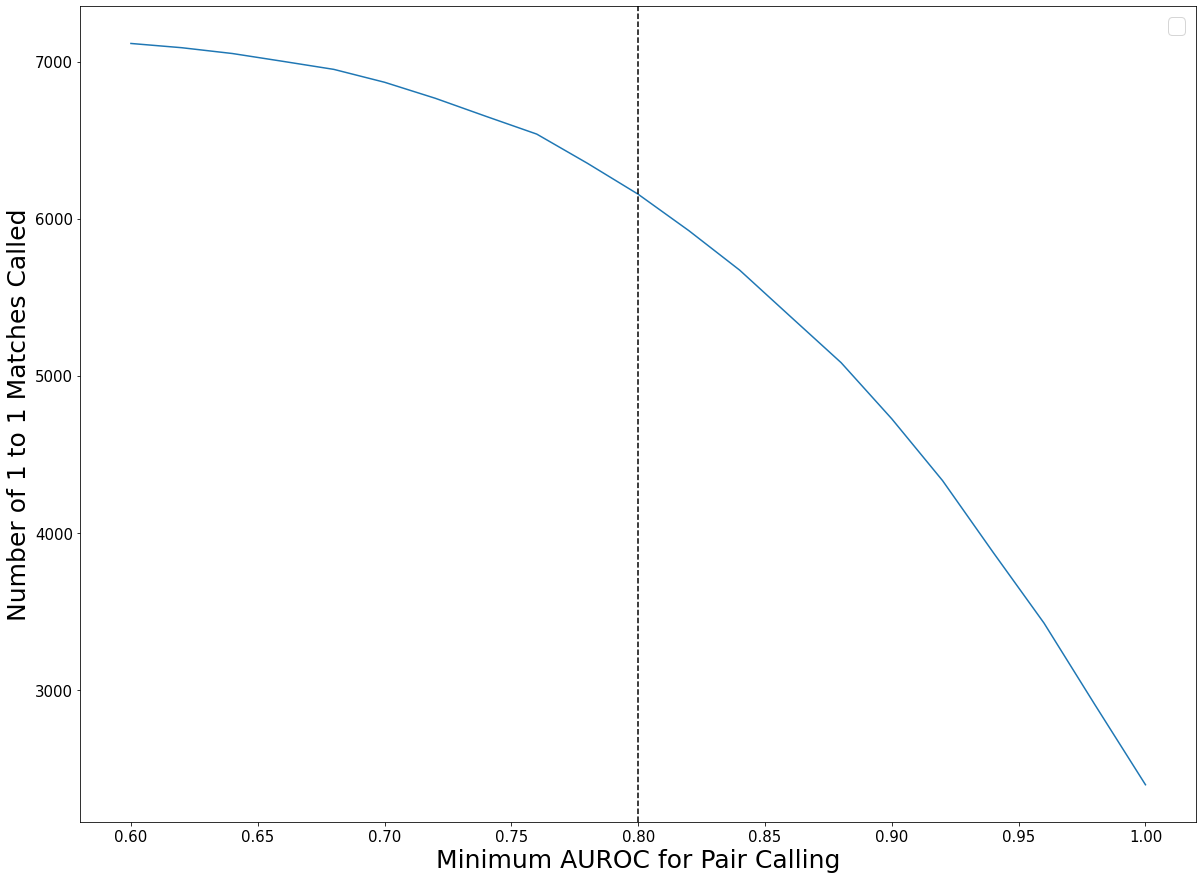

In [70]:

fig, ax = plt.subplots(figsize = (20,15))
sns.lineplot(data = plot_line_df, x = 'Minimum AUROC',y = 'Number of Gene Pairs')
plt.axvline(.8, 0,7500,color = 'k', linestyle = '--')
plt.ylabel("Number of 1 to 1 Matches Called", fontsize = 25)
plt.xlabel("Minimum AUROC for Pair Calling", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)

In [71]:
dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == 129] # Come Back to 114,130, 26, 29, 78, 87

wide_format = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')
wide_format

Maize,Zm00001d033637
Arabidopsis,
AT3G06460,0.384783
AT3G06470,0.751576


In [72]:
dimensions_of_groups = []
for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
    dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
    dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
    fixed_frame = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')
    dimensions_of_groups.append(list(fixed_frame.shape))

In [73]:
group_dimension_dataframe = pd.DataFrame(dimensions_of_groups, columns = ['Number of Arabidopsis Genes','Number of Maize Genes'])
#group_dimension_dataframe.to_csv('/home/passala/Gene_duplication_project/Code/Penelope_maize_meristem_project/Minor_tables/dimension_dataframe.csv',index = False)

(0.0, 5.0)

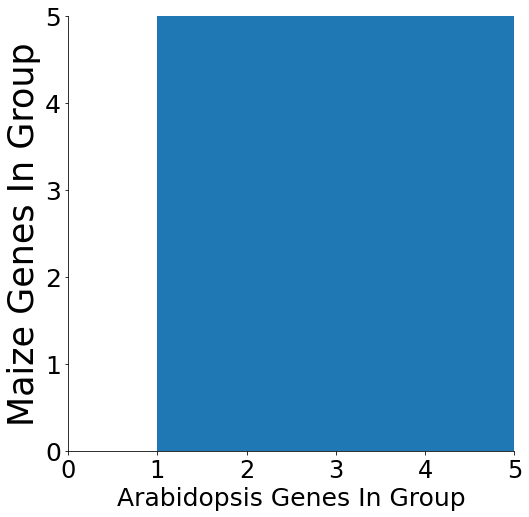

In [74]:
fig, ax = plt.subplots(figsize = (8,8))
plt.hist( x = group_dimension_dataframe['Number of Arabidopsis Genes'],bins = 10)
plt.ylabel("Maize Genes In Group", fontsize = 35)
plt.xlabel("Arabidopsis Genes In Group", fontsize = 25)
sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 25)
plt.xlim(0,5)
plt.ylim(0,5)


In [75]:
avg_rank = maize_cococonet_ranked.loc[[current_maize_gene],maize_cococonet_ranked.index.isin(finger_print_genes)]

In [76]:
other_avg_rank = maize_cococonet_ranked.loc[maize_cococonet_ranked.index.isin(finger_print_genes),[current_maize_gene]]

In [77]:
avg_rank

""
Zm00001d000436


In [78]:
other_avg_rank

,Zm00001d000436


In [79]:
finger_print_genes

['AT2G47960',
 'AT4G34460',
 'AT2G03070',
 'AT4G25720',
 'AT5G24630',
 'AT3G21350',
 'AT4G17620',
 'AT5G66180',
 'AT5G49570',
 'AT4G04920']

In [80]:
maize_cococonet_ranked

,Zm00001d027259,Zm00001d027267,Zm00001d027268,Zm00001d027276,Zm00001d027281,Zm00001d027283,Zm00001d027290,Zm00001d027291,Zm00001d027292,Zm00001d027293,...,Zm00001d000408,Zm00001d000424,Zm00001d000428,Zm00001d000430,Zm00001d000434,Zm00001d000435,Zm00001d000436,Zm00001d000439,Zm00001d000443,Zm00001d000447
Zm00001d027259,13664.0,7268.0,8155.0,7253.0,9417.0,4607.0,2664.0,1058.0,6963.0,7236.0,...,6800.0,1357.0,12753.0,2801.0,3742.0,13133.0,10012.0,3314.0,9813.0,3584.0
Zm00001d027267,6249.0,13664.0,11493.0,13560.0,2701.0,8846.0,11507.0,12099.0,8817.0,9350.0,...,12596.0,11592.0,8473.0,10959.0,11901.0,6432.0,6838.0,12930.0,5714.0,6847.0
Zm00001d027268,3304.0,3753.0,13664.0,947.0,2622.0,2535.0,1936.0,12400.0,13255.0,2773.0,...,2844.0,1810.0,1200.0,5074.0,5851.0,2714.0,2200.0,2066.0,4692.0,952.0
Zm00001d027276,6454.0,13624.0,3583.0,13664.0,8808.0,9876.0,11472.0,6804.0,3653.0,12460.0,...,10851.0,12823.0,9496.0,9242.0,11451.0,8749.0,10060.0,12406.0,4689.0,11666.0
Zm00001d027281,3064.0,291.0,1629.0,1905.0,13664.0,9881.0,4955.0,9287.0,3971.0,772.0,...,857.0,870.0,2706.0,150.0,3019.0,2127.0,1978.0,5081.0,3018.0,5404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d000435,12233.0,6761.0,6817.0,9783.0,7149.0,5721.0,5434.0,3015.0,5076.0,10305.0,...,9870.0,6084.0,11313.0,8865.0,4373.0,13664.0,13662.0,5445.0,7717.0,2282.0
Zm00001d000436,9953.0,9539.0,7249.0,12619.0,8706.0,6952.0,4518.0,4497.0,4494.0,12712.0,...,11722.0,9836.0,11872.0,13382.0,5798.0,13643.0,13664.0,12912.0,9284.0,5879.0
Zm00001d000439,2983.0,10290.0,4306.0,8672.0,11529.0,8638.0,2580.0,7433.0,8682.0,8991.0,...,9238.0,5168.0,5460.0,9524.0,9609.0,3880.0,7252.0,13664.0,4036.0,11509.0
Zm00001d000443,9314.0,7140.0,13179.0,5502.0,11593.0,13039.0,12663.0,12609.0,7996.0,5790.0,...,4502.0,5295.0,7664.0,8629.0,2668.0,8639.0,8691.0,7525.0,13664.0,1472.0


In [81]:
maize_cococonet_cheater.loc[current_maize_gene,:]

NameError: name 'maize_cococonet_cheater' is not defined

In [ ]:
maize_cococonet_cheater.loc['Zm00001d027232','Zm00001d027231']

In [ ]:
for top_10_set in top_10_arab_genes_as_maize.iterrows():
    maize_coconet_current_fingerprint = maize_cococonet_ranked.loc[dictionary_mapper_arab_to_maize[top_10_set[0]],maize_cococonet_ranked.index.isin(top_10_set[1].to_list()),]
    current_average_rank = maize_coconet_current_fingerprint.mean()
    all_pairs_to_evaluate_for_functional_conservation["Arabidopsis Score"].loc[(all_pairs_to_evaluate_for_functional_conservation["Arabidopsis"] == top_10_set[0]) & all_pairs_to_evaluate_for_functional_conservation["Duplicate Location"].isin([np.nan, "M1"])] = current_average_rank


In [ ]:
all_pairs_to_evaluate_for_functional_conservation

In [ ]:
maize_arab_map